# Performance Analysis

In [7]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [9]:
#reading the file and extracting the top 5 rows
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")
df.head()

,appearance_id,game_id_x,player_id_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186,700000.0,5000000,2025-06-30 00:00:00.000000000


## Visualizations and Descriptive analysis

#### 1. Evaluate and analyze player performance based on various metrics such as goals, assists.

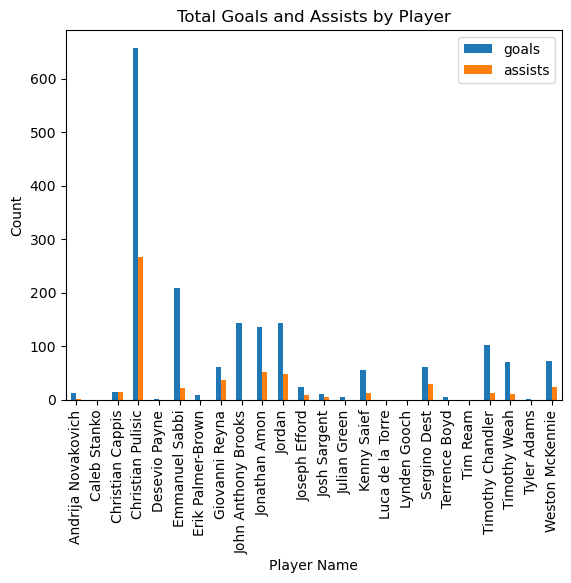

In [46]:
#clusterd chart
df.groupby('player_name_y').agg({'goals': 'sum', 'assists': 'sum'}).plot(kind='bar') #here print the dataframe and plot the graph
plt.title('Total Goals and Assists by Player')
plt.xlabel('Player Name')
plt.ylabel('Count')
plt.show()

#### Interpretation: Christian Pulisic scored more goals and given more assists

#### 2.Assess team performance in terms of home and away goals.

##### Average Goals by Home and Away Clubs

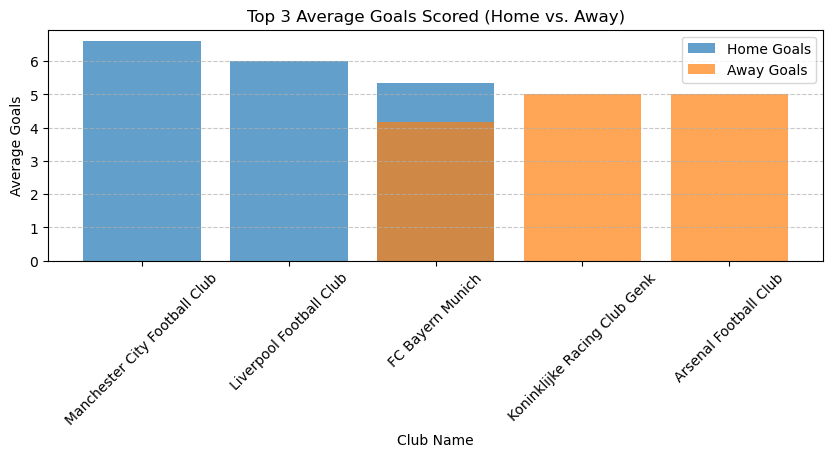

In [48]:
#stacked bar chart
# Calculate average goals scored by home and away clubs
home_goals = df.groupby('home_club_name')['home_club_goals'].mean()
away_goals = df.groupby('away_club_name')['away_club_goals'].mean()

# Sort DataFrames by average goals (descending) and select the top 3
top_3_home_goals = home_goals.sort_values(ascending=False).head(3)
top_3_away_goals = away_goals.sort_values(ascending=False).head(3)

# Create the bar chart
plt.figure(figsize=(10,3))  

# Plot bars for top 3 home and away goals
plt.bar(top_3_home_goals.index, top_3_home_goals, label='Home Goals', alpha=0.7)
plt.bar(top_3_away_goals.index, top_3_away_goals, label='Away Goals', alpha=0.7)

# Customize the plot
plt.title('Top 3 Average Goals Scored (Home vs. Away)')
plt.xlabel('Club Name')
plt.ylabel('Average Goals')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability

plt.show()

#### Interpretation:The top 3 clubs scoring average goals in the home are Manchester City Football club,Liver pool Football Club and FC Bayern Munich.The top 3 clubs scoring average goals from away are FC Bayern Munich, Koninklijike Racking club genk and arsenal Football club

#### 3. How do yellow and red card counts correlate with overall player performance?

In [26]:
#descriptive analysis
import pandas as pd
correlation = df['yellow_cards'].corr(df['minutes_played'])  # Calculate correlation between yellow cards and minutes played
print("Correlation between Yellow Cards and Minutes Played:", correlation)

correlation = df['red_cards'].corr(df['minutes_played'])  # Calculate correlation between red cards and minutes played
print("Correlation between Red Cards and Minutes Played:", correlation)

Correlation between Yellow Cards and Minutes Played: 0.12334000947162885
Correlation between Red Cards and Minutes Played: nan


#### Interpretation: Yellow cards: This indicates a weak positive relationship between yellow cards and minutes played. In simpler terms, players who spend more time on the field (play more minutes) tend to accumulate slightly more yellow cards.
#### Red cards: There are no red cards in data

#### 4. How does the distribution of yellow cards vary across different player positions?

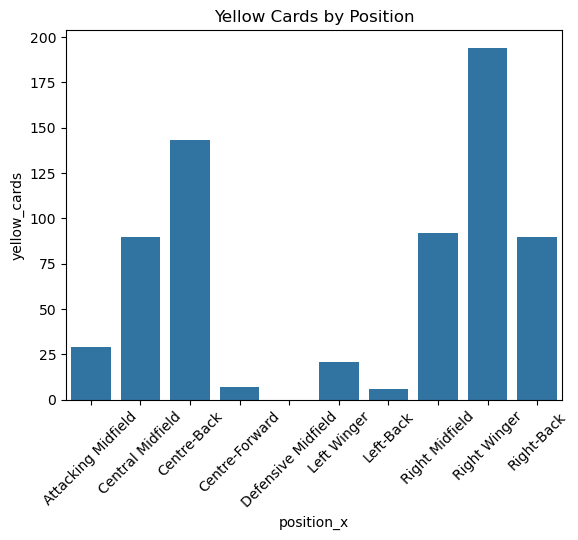

In [35]:
# Group by player position and count the number of yellow and red cards
card_counts = df.groupby('position_x')[['yellow_cards', 'red_cards']].sum().reset_index()

# Create a bar plot to visualize the counts
sns.barplot(x='position_x', y='yellow_cards', data=card_counts)
plt.title('Yellow Cards by Position')
plt.xticks(rotation=45)
plt.show()

#### Interpretation: We can see that Right Midfielders and Centre-Backs positions tend to receive the most yellow cards, while Centre-Forwards and Left-Backs receive the fewest.

#### 5.What is the average number of goals scored by home clubs versus away clubs?

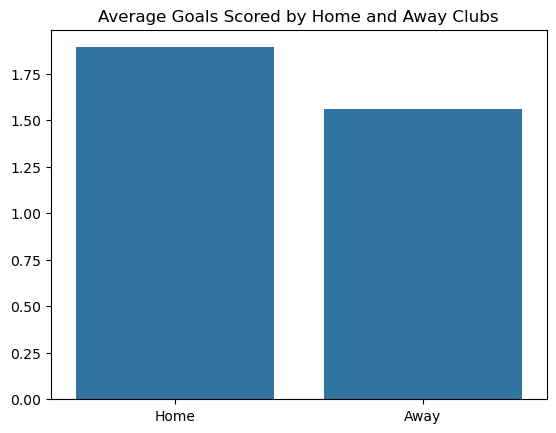

In [61]:
sns.barplot(x=['Home', 'Away'], y=[df['home_club_goals'].mean(), df['away_club_goals'].mean()])
plt.title('Average Goals Scored by Home and Away Clubs')
plt.show()

#### Interpretation: The average goals scored are 1.80 in the home and 1.50 in the away

#### 6. How does a manager's history influence the team's performance in terms of goals scored?

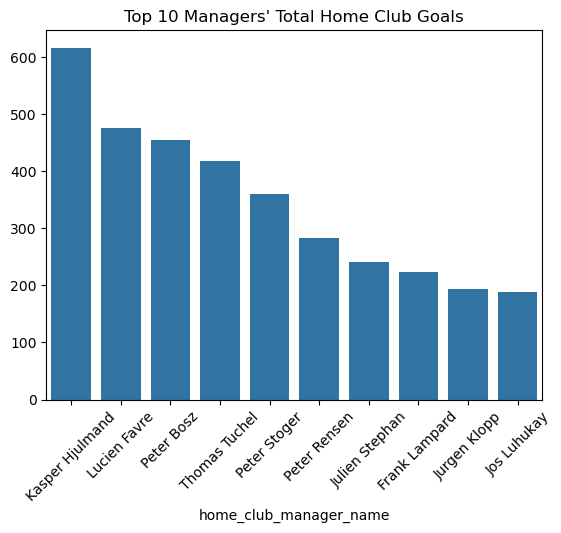

In [44]:
# Sort by managers with the most home club goals (descending order)
top_managers = df.groupby('home_club_manager_name')['home_club_goals'].sum().sort_values(ascending=False).nlargest(10)
# Create the bar plot
sns.barplot(x=top_managers.index, y=top_managers.values)
plt.title('Top 10 Managers\' Total Home Club Goals')
plt.xticks(rotation=45)
plt.show()

#### Intepretation: The Manager helps in Tactics and strategy and player's strengths and weakness,motivation the leaders. So Kasper Hjulmand has been the top manager to influnce the team overall goals while playing in homeclub.

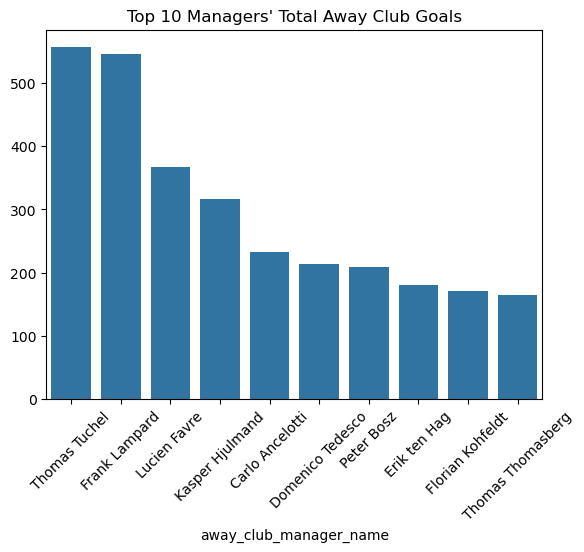

In [124]:
# Sort by managers with the most home club goals (descending order)
top_managers = df.groupby('away_club_manager_name')['away_club_goals'].sum().sort_values(ascending=False).nlargest(10)

# Create the bar plot
sns.barplot(x=top_managers.index, y=top_managers.values)
plt.title('Top 10 Managers\' Total Away Club Goals')
plt.xticks(rotation=45)
plt.show()

#### Intepretation: Thomas Tuchel has been the top manager to influnce the team overall goals while playing in homeclub.

# Probability

## 1. Conditional Probability
### Question: What is the probability that a player received a yellow card given that they played more than 90 minutes in a match?

In [222]:
import pandas as pd
prob_yellow_given_minutes = df[df['minutes_played'] > 90]['yellow_cards'].sum() / len(df[df['minutes_played'] > 90])
print(f"Conditional Probability P(Yellow Card | Minutes > 90): {prob_yellow_given_minutes:.2f}")

Conditional Probability P(Yellow Card | Minutes > 90): 0.18


#### Interpretation: The code calculates the conditional probability of a player receiving a yellow card given that they played more than 90 minutes. The output, 0.18, indicates that there is an 18% chance of a player receiving a yellow card if they play more than 90 minutes.

## 2. Joint Probability
### Question: What is the joint probability that a player scored a goal and received a yellow card in the same match?

In [225]:
# Calculate joint probability
joint_prob = len(df[(df['goals'] > 0) & (df['yellow_cards'] > 0)]) / len(df)
print(f"Joint Probability P(Goal and Yellow Card): {joint_prob:.2f}")

Joint Probability P(Goal and Yellow Card): 0.07


#### Interpretation: The results shows the joint probability of a player scoring a goal and receiving a yellow card in a single game. The output, 0.07, indicates that there is a 7% chance of observing both events (scoring a goal and receiving a yellow card) occurring together within a game.

## 3. Sampling Mean
### Question: Calculate the sample mean of minutes played by players who scored at least one goal and compare it with the population mean.

In [228]:
# Population mean
population_mean = df['minutes_played'].mean()

# Sample mean for players who scored at least one goal
sample_mean = df[df['goals'] > 0]['minutes_played'].mean()

print(f"Population Mean Minutes Played: {population_mean:.2f}")
print(f"Sample Mean Minutes Played (Goals > 0): {sample_mean:.2f}")

Population Mean Minutes Played: 69.73
Sample Mean Minutes Played (Goals > 0): 74.76


#### Interpretation:The average minutes played across all players in the dataset is 69.73 minutes.
#### The average minutes played for players who scored at least one goal is 74.76 minutes, suggesting that goal-scoring players tend to play slightly more minutes on average compared to the overall population of players.

## 4. Central Limit Theorem Application
### Question: Verify the Central Limit Theorem by taking multiple samples of minutes and plotting the distribution of sample means.

sample mean:63.76
population_mean:62.82


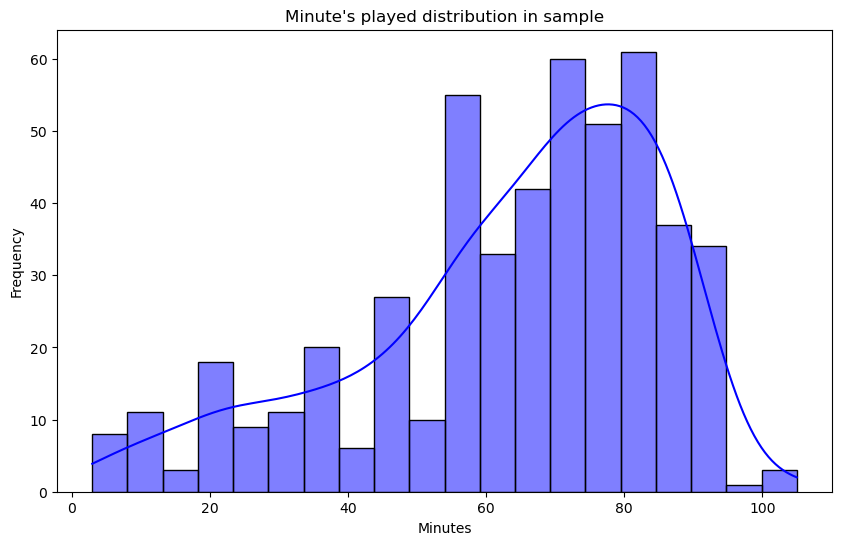

In [282]:
df=pd.read_csv("C:/Users/91918/OneDrive/Desktop/SUDHEERA/DataScience with Gen Ai/Course-10 capstone/Football_data_merged_cleaned_data.csv")

if 'minute' in df.columns:
  sample_size = 500
  sample = df.sample(n=sample_size, random_state=30)
  sample_mean = sample['minute'].mean()

  # population mean comparison
  population_mean = df['minute'].mean()
  print(f"sample mean:{sample_mean:.2f}")
  print(f"population_mean:{population_mean:.2f}")

  # visualize sample distribution
  plt.figure(figsize=(10,6))
  sns.histplot(sample['minute'],kde=True,bins=20,color='Blue')
  plt.title("Minute's played distribution in sample")
  plt.xlabel("Minutes")
  plt.ylabel("Frequency")
  plt.show()
else:
  print("The 'minute' column does not exist in the DataFrame.")

#### Interpretation:Skewed Distribution: The distribution is positively skewed, indicating that a majority of players play fewer minutes, with a few players playing significantly more. Peak Around 60-70 Minutes: The highest frequency of players falls within the 60-70 minute range, suggesting that this is a common playing time for many players. Sample Mean: 63.76 minutes Population Mean: 62.82 minutes The sample mean is slightly higher than the population mean, suggesting that the sample may have a higher proportion of players with longer playing times.

In [284]:
#CENTRAL TENDENCIES
sample_mean = sample['minute'].mean()
sample_median = sample['minute'].median()
population_mean = df['minute'].mean()
population_median= df['minute'].median()
print(f"The Population mean:{population_mean:.2f}and Sample Mean: {sample_mean:.2f}")
print(f"The Population median:{population_median:.2f}and Sample Median: {sample_median:.2f}")

The Population mean:62.82and Sample Mean: 63.76
The Population median:68.00and Sample Median: 69.00


#### Interpretation:Mean: The average number of minutes played in the population is 62.82, while the average in the sample is slightly higher at 63.76. This suggests that the sample might have a slightly higher proportion of players with longer playing times. Median: The median number of minutes played in the population is 68, while the median in the sample is 69. This indicates that half of the players in both the population and the sample play less than 68-69 minutes, and half play more.

In [286]:
sample_kurtosis = sample['minute'].kurt()
sample_skewness = sample['minute'].skew()
population_kurtosis = df['minute'].kurt()
population_skewness= df['minute'].skew()
print(f"The Population kurtosis:{population_kurtosis:.2f}and Samplekurtosis: {sample_kurtosis:.2f}")
print(f"The Population skewness:{population_skewness:.2f}and Sample skewness: {sample_skewness:.2f}")

The Population kurtosis:-0.19and Samplekurtosis: 0.08
The Population skewness:-0.76and Sample skewness: -0.88


#### Interpreation:Interpretation:Kurtosis: A negative kurtosis value indicates a platykurtic distribution, which is flatter than a normal distribution. The population has a slightly more platykurtic distribution compared to the sample. Skewness: A negative skewness value indicates a left-skewed distribution, where the tail is longer on the left side. Both the population and sample distributions are left-skewed, indicating that most players play fewer minutes, with a few playing significantly more.